In [1]:
#Import libraries and connect to MongoDB
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

client = pymongo.MongoClient("mongodb://localhost:27017")  # Or Atlas URI
db = client["covidDB"]
collection = db["covidData"]


In [2]:
#Load data from mongoDB
data = list(collection.find().sort("fetchedAt", -1).limit(200))
df = pd.DataFrame(data)

# Keep only the columns you care about
df = df[["country", "cases", "deaths", "recovered", "active", "population", "fetchedAt"]]
df.head()


,country,cases,deaths,recovered,active,population,fetchedAt
0,Micronesia,26547,65,0,26482,117489,2025-06-24 06:39:10.767
1,France,40138560,167642,39970918,0,65584518,2025-06-24 06:39:10.767
2,French Polynesia,79254,650,0,78604,284164,2025-06-24 06:39:10.767
3,Portugal,5643062,28126,5614809,127,10140570,2025-06-24 06:39:10.767
4,Burundi,54721,38,53569,1114,12624840,2025-06-24 06:39:10.767


In [3]:
#Explore basic data
print(f"Total countries: {df['country'].nunique()}")
print(df.describe())

# Check for missing values
df.isnull().sum()


Total countries: 200
              cases         deaths     recovered        active    population  \
count  2.000000e+02     200.000000  2.000000e+02  2.000000e+02  2.000000e+02   
mean   2.530531e+06   25671.370000  1.925118e+06  5.797409e+05  3.446052e+07   
min    9.000000e+00       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.758825e+04     188.750000  2.319250e+03  7.225000e+01  4.003355e+05   
50%    2.050660e+05    1521.000000  6.025550e+04  1.305000e+03  5.243736e+06   
75%    1.317259e+06   12992.250000  1.015445e+06  2.711875e+04  1.921633e+07   
max    4.503539e+07  711380.000000  3.997092e+07  4.450182e+07  1.448471e+09   
std    7.166629e+06   79434.471074  5.974780e+06  4.012687e+06  1.464515e+08   

                           fetchedAt  
count                            200  
mean   2025-06-24 06:39:10.767000064  
min       2025-06-24 06:39:10.767000  
25%    2025-06-24 06:39:10.767000064  
50%    2025-06-24 06:39:10.767000064  
75%    2025-06-24 06:39:

country       0
cases         0
deaths        0
recovered     0
active        0
population    0
fetchedAt     0
dtype: int64

C:\Users\M4PC-56\AppData\Local\Temp\ipykernel_19800\995668133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top15, y="country", x="cases", palette="viridis")


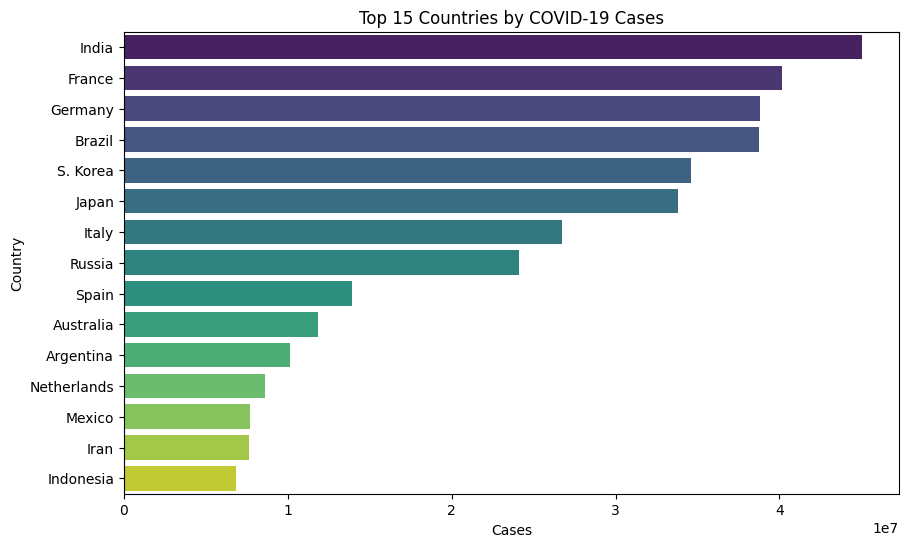

In [4]:
#Visualization – Bar chart
top15 = df.sort_values("cases", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=top15, y="country", x="cases", palette="viridis")
plt.title("Top 15 Countries by COVID-19 Cases")
plt.xlabel("Cases")
plt.ylabel("Country")
plt.show()


In [5]:
#Visualization – Scatter plot (death vs recovery)
df["death_rate"] = (df["deaths"] / df["cases"]) * 100
df["recovery_rate"] = (df["recovered"] / df["cases"]) * 100

fig = px.scatter(df, x="recovery_rate", y="death_rate", size="cases", hover_name="country",
                 title="Recovery Rate vs Death Rate by Country")
fig.show()


In [6]:
#Export the cleaned data
df.to_csv("covid_cleaned_data.csv", index=False)
